In [2]:
import tensorflow as tf
import numpy as np

print ('Tensorflow version: ', tf.__version__)

/Users/xiaogezhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/xiaogezhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version:  1.4.1


## TensorFlow Basics

### Tensors

In [3]:
hello = tf.constant('Hello')

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
world = tf.constant('World')

In [6]:
result = hello + world

In [7]:
result

<tf.Tensor 'add:0' shape=() dtype=string>

In [8]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [9]:
result

b'HelloWorld'

### Computations

In [10]:
tensor_1 = tf.constant(1)
tensor_2 = tf.constant(2)

In [11]:
res = tensor_1 + tensor_2

In [12]:
type(res)

tensorflow.python.framework.ops.Tensor

In [12]:
with tf.Session() as sess:
    res = sess.run(tensor_1 + tensor_2)
res

3

### Matrix Operations

In [13]:
sess = tf.InteractiveSession()
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myrandn = tf.random_normal((4,4),mean=0,stddev=0.5)

In [15]:
a = tf.constant([ [1,2],
                  [3,4] ])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [16]:
b = tf.constant([[10],[100]])

b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [17]:
result = tf.matmul(a,b)
result.eval()

array([[210],
       [430]], dtype=int32)

### Variables and Placeholders

#### Variables can be used to hold the values of weights and biases that will be optimized through backpropagation algorithm. 
#### Variables need to be initialized. 

In [18]:
my_tensor = tf.random_uniform((4,4),0,1)

my_var = tf.Variable()
print (my_var)

ValueError: initial_value must be specified.

In [28]:
## Attention: all the global variables must be initialized before they can be used
init = tf.global_variables_initializer()
init.run()
my_var.eval()

array([[0.68843925, 0.06951118, 0.4767313 , 0.34576714],
       [0.5772841 , 0.6287644 , 0.74237597, 0.37395048],
       [0.7068802 , 0.3391198 , 0.48243117, 0.47480857],
       [0.670897  , 0.04317081, 0.9839406 , 0.28229344]], dtype=float32)

#### Placeholders are initially empty, and are used to feed in the actual training examples. However, they do need a declared expected data type. 

In [29]:
ph = tf.placeholder(tf.float64)

# Regression

### Create dataset

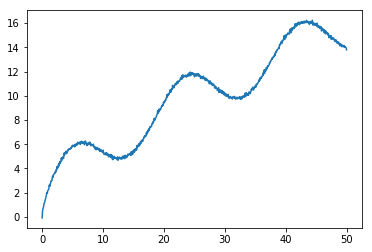

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samples = 1000
x = np.linspace(0, 50, samples).astype(np.float32)
noise = np.random.normal(loc = 0, scale = 0.08, size = samples)

y = 2*np.sin(x/3) + 1.5*x**0.5 + x/10 + noise
y = y.astype(np.float32)

%matplotlib inline
plt.plot(x, y)

### Split the dataset

In [21]:
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state= 101)

### Create deep learning-based regression model

In [25]:
import tensorflow as tf


x_feat = tf.feature_column.numeric_column('x', shape = [1])

regressor = tf.estimator.DNNRegressor(hidden_units = [20, 20, 20, 20, 20, 20, 20, 20], feature_columns = [x_feat], 
                                      optimizer = tf.train.AdamOptimizer(learning_rate = 0.001), 
                                      activation_fn = tf.nn.relu)

input_func = tf.estimator.inputs.numpy_input_fn(x = {'x': x_train}, y = y_train, batch_size = 20, 
                                                num_epochs = 600, shuffle = True)

## train the model
regressor.train(input_fn = input_func, steps = 20000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/19/1dxjj_9j4_zgswcbzb_njt6r0000gn/T/tmpg_qo24oz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181d1e7e10>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/19/1dxjj_9j4_zgswcbzb_njt6r0000gn/T/tmpg_qo24oz/model.ckpt.
INFO:tensorflow:loss = 2170.6067, step = 1
INFO:tensorflow:global_step/sec: 440.137
INFO:tensorflow:loss = 55.8006, step = 101 (0.228 sec)
INFO:tensorflow:global_step/sec: 458.098
INFO:tensorflow:loss = 78.38868, ste

INFO:tensorflow:global_step/sec: 490.517
INFO:tensorflow:loss = 24.875975, step = 7501 (0.207 sec)
INFO:tensorflow:global_step/sec: 483.397
INFO:tensorflow:loss = 19.550388, step = 7601 (0.203 sec)
INFO:tensorflow:global_step/sec: 483.4
INFO:tensorflow:loss = 25.182148, step = 7701 (0.206 sec)
INFO:tensorflow:global_step/sec: 512.069
INFO:tensorflow:loss = 25.711845, step = 7801 (0.194 sec)
INFO:tensorflow:global_step/sec: 477.218
INFO:tensorflow:loss = 13.400686, step = 7901 (0.210 sec)
INFO:tensorflow:global_step/sec: 541.588
INFO:tensorflow:loss = 24.109089, step = 8001 (0.191 sec)
INFO:tensorflow:global_step/sec: 451.537
INFO:tensorflow:loss = 28.48536, step = 8101 (0.216 sec)
INFO:tensorflow:global_step/sec: 412.21
INFO:tensorflow:loss = 10.254711, step = 8201 (0.239 sec)
INFO:tensorflow:global_step/sec: 456.056
INFO:tensorflow:loss = 30.33763, step = 8301 (0.221 sec)
INFO:tensorflow:global_step/sec: 472.905
INFO:tensorflow:loss = 30.987778, step = 8401 (0.211 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.7028519, step = 15701 (0.221 sec)
INFO:tensorflow:global_step/sec: 308.953
INFO:tensorflow:loss = 0.27022064, step = 15801 (0.328 sec)
INFO:tensorflow:global_step/sec: 423.641
INFO:tensorflow:loss = 0.70358133, step = 15901 (0.229 sec)
INFO:tensorflow:global_step/sec: 544.977
INFO:tensorflow:loss = 0.5771282, step = 16001 (0.183 sec)
INFO:tensorflow:global_step/sec: 583.169
INFO:tensorflow:loss = 1.3527094, step = 16101 (0.172 sec)
INFO:tensorflow:global_step/sec: 563.298
INFO:tensorflow:loss = 0.41320807, step = 16201 (0.178 sec)
INFO:tensorflow:global_step/sec: 486.573
INFO:tensorflow:loss = 1.5971068, step = 16301 (0.209 sec)
INFO:tensorflow:global_step/sec: 478.909
INFO:tensorflow:loss = 0.922683, step = 16401 (0.207 sec)
INFO:tensorflow:global_step/sec: 452.041
INFO:tensorflow:loss = 0.3711704, step = 16501 (0.222 sec)
INFO:tensorflow:global_step/sec: 520.533
INFO:tensorflow:loss = 0.52184457, step = 16601 (0.190 sec)
INFO:tensorflow:global_step/sec: 455.2

In [26]:
# make predictions
eval_input = tf.estimator.inputs.numpy_input_fn(x = {'x': x_test}, shuffle = False)
prediction = list(regressor.predict(eval_input))

pred_val = [pred['predictions'] for pred in prediction]

INFO:tensorflow:Restoring parameters from /var/folders/19/1dxjj_9j4_zgswcbzb_njt6r0000gn/T/tmpg_qo24oz/model.ckpt-20000


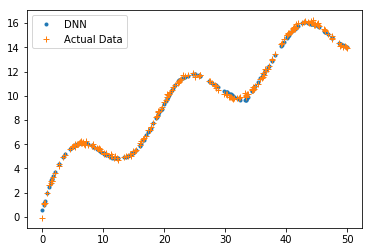

In [27]:
# result comparison
plt.plot(x_test, pred_val, '.')
plt.plot(x_test, y_test, '+')
plt.legend(['DNN', 'Actual Data'])

## Classification

### Raw data analysis

In [181]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [182]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [183]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [184]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [185]:
mnist.train.num_examples

55000

In [186]:
mnist.test.num_examples

10000

### Image visualization

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

mnist.train.images[1].shape

(784,)

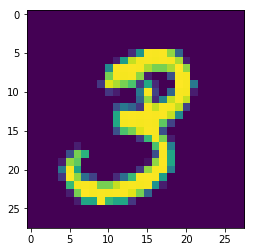

In [188]:
plt.imshow(np.reshape(mnist.train.images[1], newshape=(28, 28)))

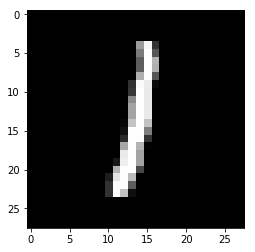

In [189]:
plt.imshow(mnist.train.images[4].reshape(28,28),cmap='gist_gray')

### Create CNN model

In [198]:
x = tf.placeholder(tf.float32, shape = [None, 784])
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [199]:
## create convolutional neural network
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using built-in conv2d from tensorflow.

Computes a 2-D convolution given 4-D input and filter tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]` and a filter / kernel tensor of shape `[filter_height, filter_width, in_channels, out_channels]`, this operation performs the following:

1. Flattens the filter to a 2-D matrix with shape `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual* tensor of shape `[batch, out_height, out_width,     filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch vector.

In [ ]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [206]:
x_image = tf.reshape(x, [-1,28,28,1])

# Using a 6by6 filter here, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image, shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)


# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)


# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous convolution
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))


# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

y_pred = normal_full_layer(full_one_dropout, 10)

## Loss function

In [207]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

## Optimizer

In [208]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

## Init gloabl variables

In [203]:
init = tf.global_variables_initializer()

In [205]:
steps = 4000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y, hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches, tf.float32))

            print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels, hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.1038


Currently on step 100
Accuracy is:
0.8529


Currently on step 200
Accuracy is:
0.913


Currently on step 300
Accuracy is:
0.9284


Currently on step 400
Accuracy is:
0.9418


Currently on step 500
Accuracy is:
0.9508


Currently on step 600
Accuracy is:
0.949


Currently on step 700
Accuracy is:
0.9562


Currently on step 800
Accuracy is:
0.9595


Currently on step 900
Accuracy is:
0.9648


Currently on step 1000
Accuracy is:
0.9665


Currently on step 1100
Accuracy is:
0.9672


Currently on step 1200
Accuracy is:
0.9701


Currently on step 1300
Accuracy is:
0.9718


Currently on step 1400
Accuracy is:
0.9738


Currently on step 1500
Accuracy is:
0.9736


Currently on step 1600
Accuracy is:
0.9758


Currently on step 1700
Accuracy is:
0.976


Currently on step 1800
Accuracy is:
0.9766


Currently on step 1900
Accuracy is:
0.9751


Currently on step 2000
Accuracy is:
0.9767


Currently on step 2100
Accuracy is:
0.9788


Currently on step 2200
Ac